### 换另一种 loss 函数

$loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [5]:
import matplotlib.pyplot as plt

In [6]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

In [9]:
import random

In [10]:
def price(rm, k, b):
    return k * rm + b

In [11]:
def new_loss(y, y_hat):
    n = len(y)
    summary = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i > y_hat_i:
            summary += (y_i - y_hat_i)
        elif y_i < y_hat_i:
            summary += (y_hat_i - y_i)
        else:
            pass
    
    return summary / n

对 $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$ 求导

In [12]:
def new_partitial_k(y, y_hat, x):
    n = len(y)
    y = list(y)
    y_hat = list(y_hat)
    gradient = 0
    
    for y_i, y_hat_i, x_i in zip(list(y), list(y_hat), list(x)):
        if y_i > y_hat_i:
            gradient += -(y_i - y_hat_i) * x_i
        elif y_i < y_hat_i:
            gradient += (y_i - y_hat_i) * x_i
        else:
            pass
    
    return gradient / n
    

def new_partitial_b(y, y_hat, x):
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i, x_i in zip(list(y), list(y_hat), list(x)):
        if y_i > y_hat_i:
            gradient += -(y_i - y_hat_i)
        elif y_i < y_hat_i:
            gradient += (y_i - y_hat_i)
        else:
            pass
    
    return gradient / n
    

In [41]:
def generate_line_with_new_loss(n):
    X, y = data['data'], data['target']
    X_rm = X[:, 5]
    
    learning_rate = 0.001
    
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    
    min_loss = float('inf')
    
    plt.scatter(X_rm, y)
    for i in range(n):
        price_hat = [price(x_i, k, b) for x_i in X_rm]
        current_loss = new_loss(y, price_hat)
        
        if current_loss < min_loss:
            min_loss = current_loss
            if i % 50 == 0:
                print(f'time: {i} current_loss: {min_loss} currnt_k: {k} current_b: {b}')
                plt.scatter(X_rm, price_hat)

 
            
        k_gradient = new_partitial_k(y, price_hat, X_rm)
        b_gradient = new_partitial_b(y, price_hat, X_rm)
        
        k = k + (-1 * k_gradient) * learning_rate
        b = b + (-1 * b_gradient) * learning_rate
    

time: 0 current_loss: 619.6535955738608 currnt_k: -86.48186662038773 current_b: -53.613876404891684
time: 50 current_loss: 76.52825898727566 currnt_k: -2.1700817496850124 current_b: -40.357282275730114
time: 100 current_loss: 9.924530277139311 currnt_k: 8.252345920545142 current_b: -38.716707297246316


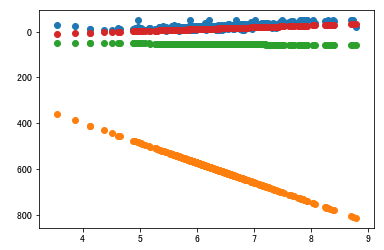

In [45]:
generate_line_with_new_loss(2000)